<a href="https://colab.research.google.com/github/Parth4070/Task2/blob/main/ipl_EDA_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple, Optional

In [1]:
# importing the file
!pip install gdown openpyxl -q
import gdown
import pandas as pd
import requests
import os
file_id = '1eUrPYL32VykYfRWIspYoBlWJk2g2CRM1e9nTX351_ds'
output = 'ipl_data.xlsx'
gdown.download(id=file_id, output=output, quiet=False)

df = pd.read_excel("ipl_data.xlsx", engine='openpyxl')
df.to_csv("ipl_data.csv", index=False)

os.remove("ipl_data.xlsx")

df.head()

Downloading...
From (original): https://drive.google.com/uc?id=1eUrPYL32VykYfRWIspYoBlWJk2g2CRM1e9nTX351_ds
From (redirected): https://docs.google.com/spreadsheets/d/1eUrPYL32VykYfRWIspYoBlWJk2g2CRM1e9nTX351_ds/export?format=xlsx
To: /content/ipl_data.xlsx
12.1MB [00:00, 38.8MB/s]


,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,date
0,335982,1,0.1,0,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2008-04-18
1,335982,1,0.2,0,2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18
2,335982,1,0.3,0,3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18
3,335982,1,0.4,0,4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18
4,335982,1,0.5,0,5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18


In [3]:
df.columns

Index(['matchId', 'inning', 'over_ball', 'over', 'ball', 'batting_team',
       'bowling_team', 'batsman', 'non_striker', 'bowler', 'batsman_runs',
       'extras', 'isWide', 'isNoBall', 'Byes', 'LegByes', 'Penalty',
       'dismissal_kind', 'player_dismissed', 'date'],
      dtype='object')

In [4]:
# Updating old team names with the new ones
new_teams = {
    "Delhi Daredevils" : "Delhi Capitals",
    "Rising Pune Supergiants" : "Chennai Super Kings",
    "Rising Pune Supergiant":"Chennai Super Kings",
    "Kings XI Punjab" : "Punjab Kings",
    "Deccan Chargers" : "Sunrisers Hyderabad",
    "Royal Challengers Bengaluru":"Royal Challengers Bangalore"
}

In [5]:
df["batting_team"] = df["batting_team"].replace(new_teams)
df["bowling_team"] = df["bowling_team"].replace(new_teams)

In [6]:
# Calcualting total runs made by batsman
total_runs = df.groupby("batsman")["batsman_runs"].sum().reset_index()
total_runs = total_runs.sort_values(by="batsman_runs", ascending=False)
total_runs.head()

,batsman,batsman_runs
632,V Kohli,8014
513,S Dhawan,6769
478,RG Sharma,6630
147,DA Warner,6567
547,SK Raina,5536


In [7]:
#Calculating total wickets by bowlers
wickets = df[df["dismissal_kind"].notnull() & (df["dismissal_kind"] != "run out")]
wickets = wickets.groupby("bowler")["dismissal_kind"].count().reset_index()
wickets.rename(columns={"dismissal_kind": "Wickets"}, inplace=True)
wickets = wickets.sort_values(by="Wickets", ascending=False)
wickets.head()

,bowler,Wickets
447,YS Chahal,205
299,PP Chawla,192
102,DJ Bravo,183
61,B Kumar,181
306,R Ashwin,181


In [8]:
df.columns

Index(['matchId', 'inning', 'over_ball', 'over', 'ball', 'batting_team',
       'bowling_team', 'batsman', 'non_striker', 'bowler', 'batsman_runs',
       'extras', 'isWide', 'isNoBall', 'Byes', 'LegByes', 'Penalty',
       'dismissal_kind', 'player_dismissed', 'date'],
      dtype='object')

In [9]:
# Calcualting total tuns per team
df["total_runs"] = df["extras"] + df["batsman_runs"]
total_runs_team = df.groupby("batting_team")["total_runs"].sum().reset_index()
total_runs_team = total_runs_team.sort_values(by="total_runs", ascending=False)
total_runs_team.head()

,batting_team,total_runs
0,Chennai Super Kings,43162
7,Mumbai Indians,42176
11,Royal Challengers Bangalore,40622
12,Sunrisers Hyderabad,40534
9,Punjab Kings,39600


In [10]:
# Calculating total wickets per team
wickets_df = df[df["dismissal_kind"].notnull()]
total_wickets_team = wickets_df.groupby("bowling_team")["dismissal_kind"].count().reset_index()
total_wickets_team.rename(columns={"dismissal_kind":"wickets"}, inplace=True)
total_wickets_team = total_wickets_team.sort_values(by="wickets", ascending=False)
total_wickets_team.head()

,bowling_team,wickets
0,Chennai Super Kings,1670
7,Mumbai Indians,1591
12,Sunrisers Hyderabad,1520
1,Delhi Capitals,1498
11,Royal Challengers Bangalore,1494


Text(0.5, 1.0, 'Team Wickets')

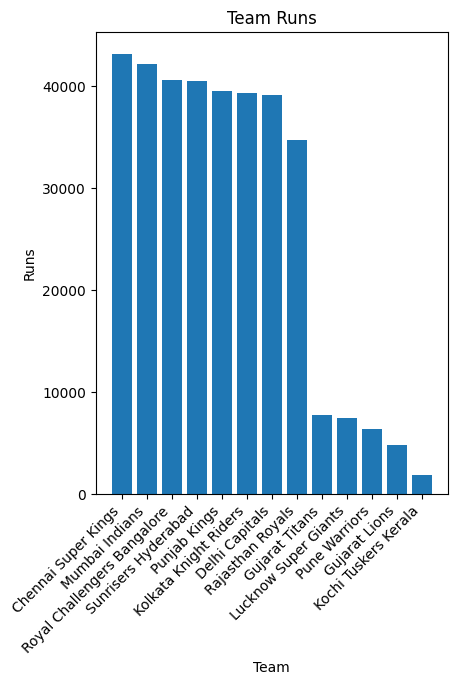

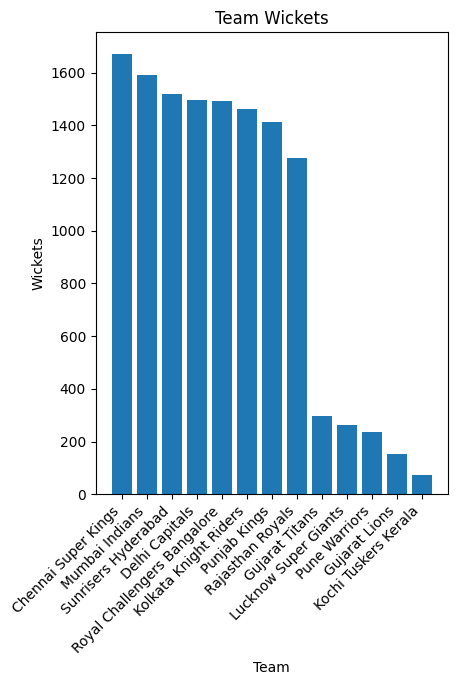

In [11]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.bar(total_runs_team["batting_team"], total_runs_team["total_runs"])
plt.xlabel("Team")
plt.ylabel("Runs")
plt.xticks(rotation=45, ha="right")
plt.title("Team Runs")

plt.figure(figsize=(10,6))
plt.subplot(1, 2, 2)
plt.bar(total_wickets_team["bowling_team"], total_wickets_team["wickets"])
plt.xlabel("Team")
plt.ylabel("Wickets")
plt.xticks(rotation=45, ha="right")
plt.title("Team Wickets")

In [12]:
# Functions to calculate cricket metrics

def strike_rate(runs: int, balls: int) -> float:
    return (runs / balls * 100) if balls > 0 else 0.0

def economy_rate(runs_conceded: int, balls_bowled: int) -> float:
    return (runs_conceded * 6 / balls_bowled) if balls_bowled > 0 else 0.0

def bowling_strike_rate(balls_bowled: int, wickets: int) -> float:
    return (balls_bowled / wickets) if wickets > 0 else np.nan

def boundary_counts(series_runs: pd.Series) -> Tuple[int, int]:
    fours = int((series_runs == 4).sum())
    sixes = int((series_runs == 6).sum())
    return fours, sixes

def add_player_phase_filters(df: pd.DataFrame, phase:Optional[str]=None):
    return df if phase is None else df[df["phase"] == phase]


## Batting Analysis

In [13]:
df.columns

Index(['matchId', 'inning', 'over_ball', 'over', 'ball', 'batting_team',
       'bowling_team', 'batsman', 'non_striker', 'bowler', 'batsman_runs',
       'extras', 'isWide', 'isNoBall', 'Byes', 'LegByes', 'Penalty',
       'dismissal_kind', 'player_dismissed', 'date', 'total_runs'],
      dtype='object')

In [14]:
BATTER = "batsman"

def batter_info(data: pd.DataFrame ,min_balls : int = 100) -> pd.DataFrame:
  gcols = [BATTER]
  grp = data.groupby(gcols, dropna=False)
  out = grp.agg(
        runs=("batsman_runs", "sum"),
        balls=("batsman_runs", "count"),
        dots=("batsman_runs", lambda s: int((s == 0).sum())),
    ).reset_index()

  out["strike_rate"] = out.apply(lambda r: strike_rate(r["runs"], r["balls"]), axis=1)
  out["dots_pct"] = out["dots"] / out["balls"] * 100

  b = data[[BATTER, "batsman_runs"]].copy()
  b["Fours"] = (b["batsman_runs"]==4).astype(int)
  b["Sixes"] = (b["batsman_runs"]==6).astype(int)
  b_sum = b.groupby(gcols, dropna=False)[["Fours", "Sixes"]].sum().reset_index()
  out = out.merge(b_sum, on=gcols, how="left")
  out["boundary_pct"] = (out["Fours"] + out["Sixes"]) / out["balls"] * 100
  out = out[out["balls"] >= min_balls].sort_values(["runs", "strike_rate"], ascending=[False, False])
  return out

batting_overall = batter_info(df, min_balls=100)


print("Top 20 batters info")
display(batting_overall.head(20))

Top 20 batters info


,batsman,runs,balls,dots,strike_rate,dots_pct,Fours,Sixes,boundary_pct
632,V Kohli,8014,6236,2198,128.511867,35.246953,708,273,15.731238
513,S Dhawan,6769,5483,2136,123.454313,38.956775,768,153,16.797374
478,RG Sharma,6630,5183,2036,127.918194,39.282269,599,281,16.978584
147,DA Warner,6567,4849,1873,135.429986,38.626521,663,236,18.539905
547,SK Raina,5536,4177,1476,132.535312,35.336366,506,204,16.997845
374,MS Dhoni,5243,3947,1423,132.835065,36.052698,363,252,15.581454
30,AB de Villiers,5181,3487,1115,148.580442,31.975911,414,253,19.128190
124,CH Gayle,4997,3516,1636,142.121729,46.530148,408,359,21.814562
502,RV Uthappa,4954,3927,1598,126.152279,40.692641,481,182,16.883117
282,KD Karthik,4843,3687,1329,131.353404,36.045566,466,161,17.005696


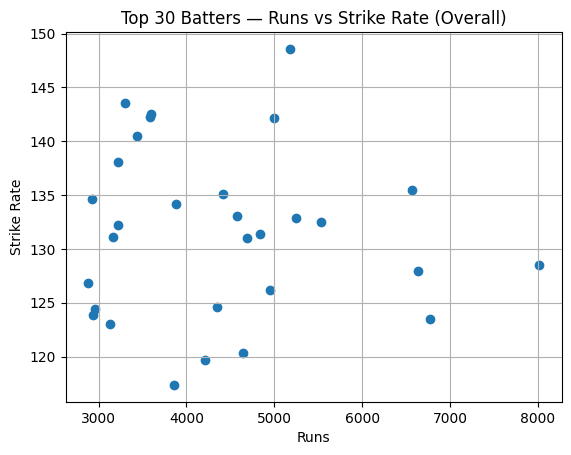

In [15]:
# Visualizing Strike rate vs Runs
topN = 30
plot_df = batting_overall.head(topN).sort_values("runs", ascending=False)
plt.figure()
plt.scatter(plot_df["runs"], plot_df["strike_rate"])

plt.xlabel("Runs")
plt.ylabel("Strike Rate")
plt.title(f"Top {topN} Batters — Runs vs Strike Rate (Overall)")
plt.grid(True)
plt.show()

## Bowling Analysis

In [16]:
df.columns

Index(['matchId', 'inning', 'over_ball', 'over', 'ball', 'batting_team',
       'bowling_team', 'batsman', 'non_striker', 'bowler', 'batsman_runs',
       'extras', 'isWide', 'isNoBall', 'Byes', 'LegByes', 'Penalty',
       'dismissal_kind', 'player_dismissed', 'date', 'total_runs'],
      dtype='object')

In [17]:
def bowling_info(data: pd.DataFrame, min_balls: int=120) -> pd.DataFrame:
    gcols = ["bowler"]
    grp = data.groupby(gcols, dropna=False)

    df["is_wicket"] = df["dismissal_kind"].notna() & (df["dismissal_kind"] != "run out")
    df["is_wicket"] = df["is_wicket"].astype(int)
    out = grp.agg(
        runs_conceded=("total_runs", "sum"),
        balls=("total_runs", "count"),
        wickets=("is_wicket", "sum"),
        dots=("batsman", lambda s: int((s == 0).sum())),
    ).reset_index()
    out["economy"] = out.apply(lambda r: economy_rate(r["runs_conceded"], r["balls"]), axis=1)
    out["bowl_strike_rate"] = out.apply(lambda r: bowling_strike_rate(r["balls"], r["wickets"]), axis=1)
    out["dots_pct"] = out["dots"] / out["balls"] * 100
    out = out[out["balls"] >= min_balls].sort_values(["economy", "bowl_strike_rate"], ascending=[True, True])
    return out

bowling_overall = bowling_info(df, min_balls=120)

print("Top (overall) economical bowlers — head:")
display(bowling_overall.head(20))



Top (overall) economical bowlers — head:


,bowler,runs_conceded,balls,wickets,dots,economy,bowl_strike_rate,dots_pct
474,Sohail Tanvir,275,265,22,0,6.226415,12.045455,0.0
2,A Chandila,245,234,11,0,6.282051,21.272727,0.0
141,FH Edwards,160,150,5,0,6.400000,30.000000,0.0
444,SMSM Senanayake,211,195,9,0,6.492308,21.666667,0.0
443,SM Pollock,307,280,11,0,6.578571,25.454545,0.0
7,A Kumble,1089,983,45,0,6.646999,21.844444,0.0
147,GD McGrath,366,329,12,0,6.674772,27.416667,0.0
264,M Muralitharan,1765,1581,64,0,6.698292,24.703125,0.0
174,IS Sodhi,204,182,9,0,6.725275,20.222222,0.0
182,J Yadav,447,398,8,0,6.738693,49.750000,0.0


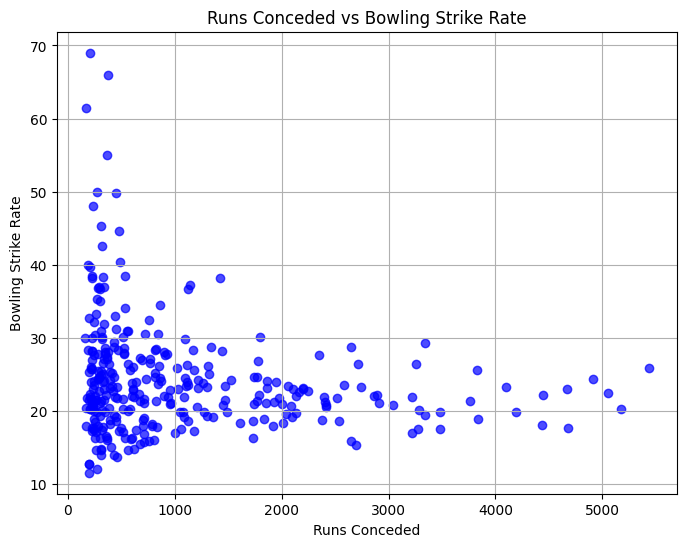

In [20]:
#Visulaizing runs_conceded vs Bowling Strike Rate
plt.figure(figsize=(8, 6))
plt.scatter(
    bowling_overall["runs_conceded"],
    bowling_overall["bowl_strike_rate"],
    alpha=0.7,
    color="blue"
)

plt.xlabel("Runs Conceded")
plt.ylabel("Bowling Strike Rate")
plt.title("Runs Conceded vs Bowling Strike Rate")


plt.grid(True)
plt.show()